PROJECT:
PROJECT PHASE 1
AUTHOR: LILIAN NGIGE

Project Overview
We are going to use several datas to help us draw insight on movie creations for Mocrosoft.

Business Problem
Microsoft want to create a new movie studio,but they dont know anything about creating movies.
We are going to explore what kind of films are doing the best at the box office to enable Microsoft decide on what type of films to create


In [33]:
# loading needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [34]:
# loading provided data
bom_gross=pd.read_csv('C:/Users/Dell/Desktop/Phase1_poject/zippedData/bom.movie_gross.csv')

# check the number of rows and column
bom_gross.shape
 

(3387, 5)

In [35]:
#  Exploring the first top rows of the data
bom_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [36]:
# checking overview of the data
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [37]:
# checking for statistical summary of the data
bom_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [38]:
#Getting count of missing values in bom_gross data
bom_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [39]:
# checking the percentage of data missing in bom_gross data
miss = bom_gross.isnull().sum().sort_values(ascending= False)
percentage_miss = (bom_gross.isnull().sum()/len(bom_gross)).sort_values(ascending =False)
missing =pd.DataFrame({"missing_values": miss,"percentage": percentage_miss}).reset_index()
missing.drop(missing[missing["percentage"]== 0].index, inplace = True)
missing

,index,missing_values,percentage
0,foreign_gross,1350,0.398583
1,domestic_gross,28,0.008267
2,studio,5,0.001476


In [40]:
# Cleaning data

# changing data type for year to datetime
bom_gross['year'] = pd.to_datetime(bom_gross['year'],errors = 'coerce')

# changing the data type for foreign_gross from object to float

bom_gross['foreign_gross'] = pd.to_numeric(bom_gross['foreign_gross'],errors = 'coerce')


# confirming the data type change for year

bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3387 non-null   object        
 1   studio          3382 non-null   object        
 2   domestic_gross  3359 non-null   float64       
 3   foreign_gross   2032 non-null   float64       
 4   year            3387 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 132.4+ KB


In [41]:
# cleaning data continuation

# filling missing data in foreign_gross with median

median_value=bom_gross['foreign_gross'].median()
bom_gross['foreign_gross'].fillna(value=median_value, inplace=True)

# filling missing data in domestic_gross with median

median_value=bom_gross['domestic_gross'].median()
bom_gross['domestic_gross'].fillna(value=median_value, inplace=True)

# Dropping rows with missing values in studio'

bom_gross.dropna(subset = ['studio'], inplace=True)

# confirming the change of data type & correction of missing values for foreign_gross  


bom_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

The above cell indicates that the bom_gross data has been cleaned

In [42]:
# loading title_basics data
title_basics= pd.read_csv('C:/Users/Dell/Desktop/Phase1_poject/zippedData/title.basics.csv')

# Displaying the first top rows of title basics data
title_basics.shape


(146144, 6)

In [43]:
title_basics.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [44]:
# overview of the data
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [45]:
# finding count for missing data
title_basics.isna().sum() 
# genre has 0.037 percent of missing data ,we ignore since its not significant


tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [46]:
# Cleaning title_basics data

# Changing data type for start_year & runtime_minutes to data time

title_basics['start_year']= pd.to_datetime(title_basics['start_year'],errors = 'coerce')
title_basics['runtime_minutes']= pd.to_datetime(title_basics['runtime_minutes'],errors = 'coerce')

In [47]:
# getting an overview of the data
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   tconst           146144 non-null  object        
 1   primary_title    146144 non-null  object        
 2   original_title   146123 non-null  object        
 3   start_year       146144 non-null  datetime64[ns]
 4   runtime_minutes  114405 non-null  datetime64[ns]
 5   genres           140736 non-null  object        
dtypes: datetime64[ns](2), object(4)
memory usage: 6.7+ MB


In [48]:
# cleaning data by dropping rows with NaN values for title basics

title_basics.dropna(subset = ['genres', 'runtime_minutes', 'original_title'], inplace=True)

title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   tconst           112232 non-null  object        
 1   primary_title    112232 non-null  object        
 2   original_title   112232 non-null  object        
 3   start_year       112232 non-null  datetime64[ns]
 4   runtime_minutes  112232 non-null  datetime64[ns]
 5   genres           112232 non-null  object        
dtypes: datetime64[ns](2), object(4)
memory usage: 6.0+ MB


In [49]:
# finding the mode for the most occuring movie genre
# selecting the genre column
genre_data = title_basics['genres']

split_genre_data = genre_data.str.split(',')
# split_genre_data
# flatten the data
flattened_data = [genres for sublist in split_genre_data for genres in sublist]
# flattened_data
genres_counts = pd.Series(flattened_data).value_counts()
genres_counts
# most_occuring_genre = genres_counts.idxmax()
# most_occuring_genre

Documentary    43586
Drama          41621
Comedy         20843
Thriller        9720
Horror          8606
Biography       8241
Action          8110
Romance         7782
Crime           5851
History         5793
Adventure       5740
Family          5608
Mystery         4143
Music           3800
Fantasy         2940
Sci-Fi          2727
Animation       2292
Sport           1949
News            1524
War             1229
Musical         1140
Western          388
Reality-TV        60
Talk-Show         19
Short             10
Adult              7
Game-Show          2
dtype: int64

Text(0, 0.5, 'Counts')

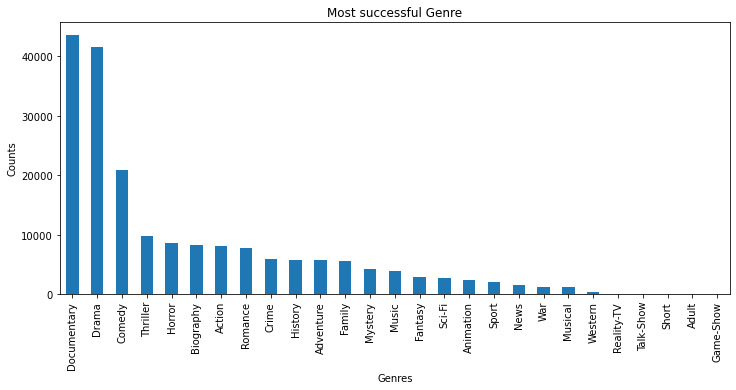

In [58]:
# Bar graph showing the most recurring movie genre
plt.figure(figsize = (12, 5))
genres_counts.plot(kind='bar')
plt.title('Most successful Genre')
plt.xlabel('Genres')
plt.ylabel('Counts')


In [51]:
# The most recurring movie genre from the graph is Documentary
most_occuring_genre = genres_counts.idxmax()
most_occuring_genre

'Documentary'

In [59]:
#  loading title_rating data

title_rating =pd.read_csv('C:/Users/Dell/Desktop/Phase1_poject/zippedData/title.ratings.csv')
# title_rating.head(10)
title_rating.shape

(73856, 3)

In [53]:
#  find missing data
title_rating.isna().sum()
# no missing data

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [60]:
# Joining two dataframes that is title_basics and title_rating
to_concat = [title_basics,title_rating]
titles = pd.concat(to_concat)

# finding number of rows and column
titles.shape


(186088, 8)

In [61]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186088 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   tconst           186088 non-null  object        
 1   primary_title    112232 non-null  object        
 2   original_title   112232 non-null  object        
 3   start_year       112232 non-null  datetime64[ns]
 4   runtime_minutes  112232 non-null  datetime64[ns]
 5   genres           112232 non-null  object        
 6   averagerating    73856 non-null   float64       
 7   numvotes         73856 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 12.8+ MB


In [62]:
titles.head(20)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,1970-01-01 00:00:00.000002013,1970-01-01 00:00:00.000000175,"Action,Crime,Drama",NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,1970-01-01 00:00:00.000002019,1970-01-01 00:00:00.000000114,"Biography,Drama",NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,1970-01-01 00:00:00.000002018,1970-01-01 00:00:00.000000122,Drama,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000000080,"Comedy,Drama,Fantasy",NaN,NaN
5,tt0111414,A Thin Life,A Thin Life,1970-01-01 00:00:00.000002018,1970-01-01 00:00:00.000000075,Comedy,NaN,NaN
7,tt0137204,Joe Finds Grace,Joe Finds Grace,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000000083,"Adventure,Animation,Comedy",NaN,NaN
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,1970-01-01 00:00:00.000002012,1970-01-01 00:00:00.000000082,Biography,NaN,NaN
10,tt0146592,Pál Adrienn,Pál Adrienn,1970-01-01 00:00:00.000002010,1970-01-01 00:00:00.000000136,Drama,NaN,NaN
11,tt0154039,So Much for Justice!,Oda az igazság,1970-01-01 00:00:00.000002010,1970-01-01 00:00:00.000000100,History,NaN,NaN
12,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,1970-01-01 00:00:00.000002013,1970-01-01 00:00:00.000000180,Documentary,NaN,NaN


In [64]:
titles.dropna(subset=['genres'], how= 'any', inplace= True)
titles

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,1970-01-01 00:00:00.000002013,1970-01-01 00:00:00.000000175,"Action,Crime,Drama",NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,1970-01-01 00:00:00.000002019,1970-01-01 00:00:00.000000114,"Biography,Drama",NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,1970-01-01 00:00:00.000002018,1970-01-01 00:00:00.000000122,Drama,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000000080,"Comedy,Drama,Fantasy",NaN,NaN
5,tt0111414,A Thin Life,A Thin Life,1970-01-01 00:00:00.000002018,1970-01-01 00:00:00.000000075,Comedy,NaN,NaN
...,...,...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,1970-01-01 00:00:00.000002019,1970-01-01 00:00:00.000000072,Documentary,NaN,NaN
146135,tt9916170,The Rehearsal,O Ensaio,1970-01-01 00:00:00.000002019,1970-01-01 00:00:00.000000051,Drama,NaN,NaN
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000000084,Documentary,NaN,NaN
146137,tt9916190,Safeguard,Safeguard,1970-01-01 00:00:00.000002019,1970-01-01 00:00:00.000000090,"Drama,Thriller",NaN,NaN


In [80]:
# Finding studio with the best ratings
# first we combine the data for bom_ gross,title_basics and title ratings

to_concat = [bom_gross,title_basics,title_rating]
combined_data = pd.concat(to_concat)
combined_data

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,1970-01-01 00:00:00.000002010,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,1970-01-01 00:00:00.000002010,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,1970-01-01 00:00:00.000002010,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000.0,1970-01-01 00:00:00.000002010,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
4,Shrek Forever After,P/DW,238700000.0,513900000.0,1970-01-01 00:00:00.000002010,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73851,NaN,NaN,NaN,NaN,NaT,tt9805820,NaN,NaN,NaT,NaT,NaN,8.1,25.0
73852,NaN,NaN,NaN,NaN,NaT,tt9844256,NaN,NaN,NaT,NaT,NaN,7.5,24.0
73853,NaN,NaN,NaN,NaN,NaT,tt9851050,NaN,NaN,NaT,NaT,NaN,4.7,14.0
73854,NaN,NaN,NaN,NaN,NaT,tt9886934,NaN,NaN,NaT,NaT,NaN,7.0,5.0


In [84]:
# Finding total of highest domestic gross

combined_data['domestic_gross'] = combined_data['domestic_gross'] 
combined_data
studio_gross = combined_data.groupby('studio')['domestic_gross'].sum()
studio_gross
sorted_studios = studio_gross.sort_values(ascending = False)
sorted_studios.head(10)

studio
BV         1.841903e+10
Uni.       1.290239e+10
WB         1.216805e+10
Fox        1.094950e+10
Sony       8.461083e+09
Par.       7.685871e+09
LGF        4.120363e+09
WB (NL)    3.995700e+09
LG/S       2.078200e+09
P/DW       1.682900e+09
Name: domestic_gross, dtype: float64

Text(0, 0.5, 'total_domestic_gross')

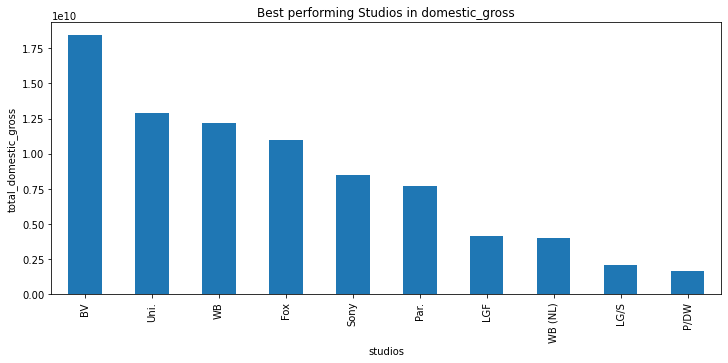

In [85]:
top_count = 10
top_studios = sorted_studios.head(top_count)
top_studios.plot(kind='bar',figsize = (12, 5))
# plt.figure(figsize = (12, 5))
# studio_gross.plot(kind='bar')
plt.title('Best performing Studios in domestic_gross')
plt.xlabel('studios')
plt.ylabel('total_domestic_gross')

Text(0, 0.5, 'total_foreign_gross')

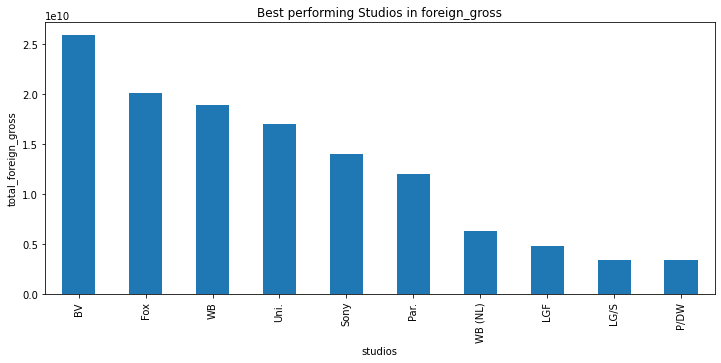

In [86]:
# Best performing studio in  Foreign_gross 
combined_data['total_foreign_gross'] = combined_data['foreign_gross'] 
studio_gross2 = combined_data.groupby('studio')['total_foreign_gross'].sum()
sorted_studios2 = studio_gross2.sort_values(ascending = False)
top_foreign_gross = sorted_studios2.head(top_count)
top_foreign_gross
# sorted_studios1.head(top_count)
# top_studios1 = sorted_studios.head(top_count)
top_foreign_gross.plot(kind='bar',figsize = (12, 5))
# sorted_studios1 = studio_gross1.sort_values(ascending = False)
# top_count = 10
# plt.figure(figsize = (12, 5))
# studio_gross.plot(kind='bar')
plt.title('Best performing Studios in foreign_gross')
plt.xlabel('studios')
plt.ylabel('total_foreign_gross')

In [87]:
# Best performing studio in both Domestic_gross and Foreign_gross(Both studios)

combined_data['total_gross'] = combined_data['domestic_gross'] + combined_data['foreign_gross']
combined_data
studio_gross = combined_data.groupby('studio')['total_gross'].sum()
studio_gross
sorted_studios = studio_gross.sort_values(ascending = False)
sorted_studios.head(10)

studio
BV         4.428848e+10
Fox        3.104317e+10
WB         3.102495e+10
Uni.       2.987056e+10
Sony       2.248204e+10
Par.       1.968156e+10
WB (NL)    1.035360e+10
LGF        8.886483e+09
LG/S       5.507524e+09
P/DW       5.076500e+09
Name: total_gross, dtype: float64

Text(0, 0.5, 'studio_gross')

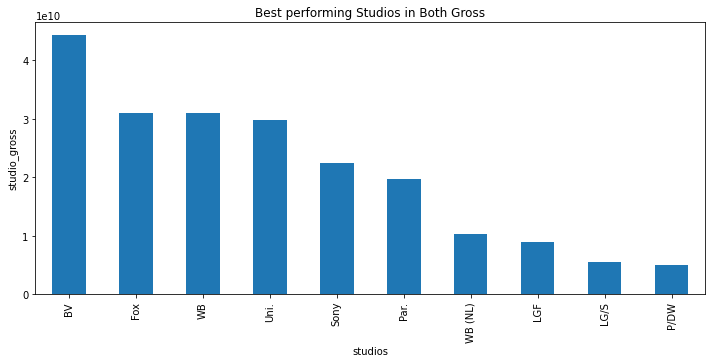

In [88]:
top_count = 10
top_studios = sorted_studios.head(top_count)
top_studios.plot(kind='bar',figsize = (12, 5))
# plt.figure(figsize = (12, 5))
# studio_gross.plot(kind='bar')
plt.title('Best performing Studios in Both Gross')
plt.xlabel('studios')
plt.ylabel('studio_gross')

Fom the bar graph above its evident that BV studio is the best performer in terms of sales in both local and international market